# PROJECT TEAM: DEVILSBASE

## TEAM MEMBERS & ROLES :

### Linh Pham
- **Role:** Data Cleaning
- **Secondary Support TM:** Adit Patel

### Tanisha Kumar
- **Role:** Research Analyst
- **Secondary Support TM:** Linh Pham

### Adit Patel
- **Role:** Data Analyst
- **Secondary Support TM:** Balaji Raj Veluchamy

### Anushka Madiwale
- **Role:** Communicator
- **Secondary Support TM:** Tanisha Kumar

### Balaji Raj Veluchamy
- **Role:** Project Coordinator & EDA
- **Secondary Support TM:** Anushka Madiwale

# BUSINESS PROBLEM & REQUIREMENTS

---



# Where should a drinks company run promotions?



## 📖 Background

Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

# DATA OVERVIEW


---



The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

"year" - year (1998-2016)

"region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast

"wine" - sale of wine in litres by year per capita

"beer" - sale of beer in litres by year per capita

"vodka" - sale of vodka in litres by year per capita

"champagne" - sale of champagne in litres by year per capita

"brandy" - sale of brandy in litres by year per capita

# IMPORT OF DATA & LIBRARIES
---

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/BTAA_7_DevilsBase/Project_1/New_russian_alcohol_consumption.csv')
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,region,wine,beer,vodka,champagne,brandy,Lat,Long,Geographic Location
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,55.60,47.15,Volga Region
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,66.00,169.49,Far East
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,63.00,130.00,Far East
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,66.01,76.47,Ural Region
1614,2016,Yaroslavl Oblast,10.2,38.0,8.9,1.4,1.0,57.63,39.89,Central and Northwestern Russia


In [154]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1615 non-null   int64  
 1   region               1615 non-null   object 
 2   wine                 1552 non-null   float64
 3   beer                 1557 non-null   float64
 4   vodka                1554 non-null   float64
 5   champagne            1552 non-null   float64
 6   brandy               1549 non-null   float64
 7   Lat                  1615 non-null   float64
 8   Long                 1615 non-null   float64
 9   Geographic Location  1615 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 126.3+ KB
None


In [155]:
df.describe()

,year,wine,beer,vodka,champagne,brandy,Lat,Long
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000,1615.000000,1615.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998,54.216235,61.161059
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201,5.986506,34.257301
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000,42.790000,21.110000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000,51.650000,39.600000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000,54.430000,46.000000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000,57.630000,73.000000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000,68.000000,169.490000


In [156]:
df.value_counts()

year  region                     wine   beer   vodka  champagne  brandy  Lat    Long    Geographic Location            
1998  Altai Krai                 3.30   19.20  11.30  1.1        0.10    53.79  83.75   Siberia and Far East               1
2011  Chukotka Autonomous Okrug  5.23   16.91  14.74  2.9        1.58    66.00  169.49  Far East                           1
2010  Smolensk Oblast            10.70  54.20  13.40  2.3        0.70    55.04  32.34   Central and Northwestern Russia    1
      Saratov Oblast             5.70   47.60  8.60   1.6        0.60    51.65  46.86   Volga Region                       1
      Samara Oblast              6.20   61.40  9.40   1.9        0.60    53.32  50.81   Volga Region                       1
                                                                                                                          ..
2004  Krasnoyarsk Krai           5.30   47.70  9.20   0.9        0.30    64.00  95.00   Siberia and Far East               1
     

In [157]:
# finding total unique regions in dataset
total_region = df['region'].unique()
print(len(total_region))
print(total_region)

85
['Republic of Adygea' 'Altai Krai' 'Amur Oblast' 'Arkhangelsk Oblast'
 'Astrakhan Oblast' 'Republic of Bashkortostan' 'Belgorod Oblast'
 'Bryansk Oblast' 'Republic of Buryatia' 'Vladimir Oblast'
 'Volgograd Oblast' 'Vologda Oblast' 'Voronezh Oblast'
 'Republic of Dagestan' 'Jewish Autonomous Oblast' 'Zabaykalsky Krai'
 'Ivanovo Oblast' 'Republic of Ingushetia' 'Irkutsk Oblast'
 'Kabardino-Balkar Republic' 'Kaliningrad Oblast' 'Republic of Kalmykia'
 'Kaluga Oblast' 'Kamchatka Krai' 'Karachay-Cherkess Republic'
 'Republic of Karelia' 'Kemerovo Oblast' 'Kirov Oblast' 'Kostroma Oblast'
 'Krasnodar Krai' 'Krasnoyarsk Krai' 'Republic of Crimea' 'Kurgan Oblast'
 'Kursk Oblast' 'Leningrad Oblast' 'Lipetsk Oblast' 'Magadan Oblast'
 'Mari El Republic' 'Republic of Mordovia' 'Moscow' 'Moscow Oblast'
 'Murmansk Oblast' 'Nenets Autonomous Okrug' 'Nizhny Novgorod Oblast'
 'Novgorod Oblast' 'Novosibirsk Oblast' 'Omsk Oblast' 'Orenburg Oblast'
 'Oryol Oblast' 'Penza Oblast' 'Perm Krai' 'Primorsky 

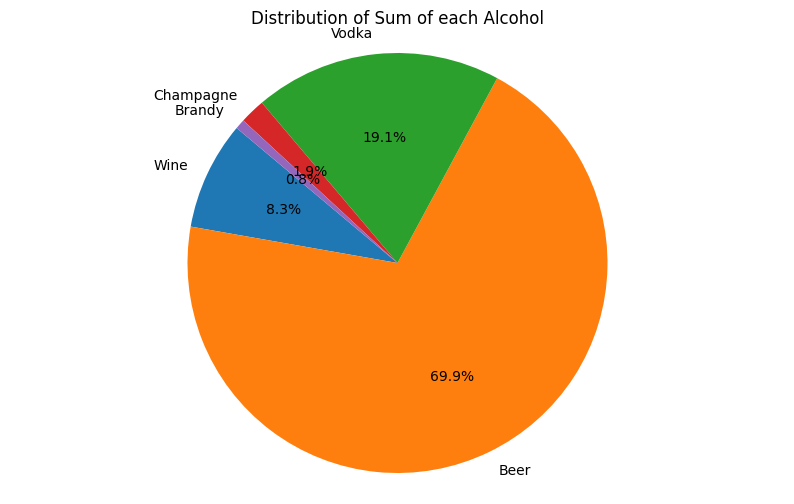

In [158]:
# Sum all the alcohol columns to get the total consumption for each year
df['total_alcohol'] = df[['wine', 'beer', 'vodka', 'champagne', 'brandy']].sum(axis=1)

# Calculate the percentage of each alcohol type relative to the overall consumption
df['wine_percent'] = (df['wine'] / df['total_alcohol']) * 100
df['beer_percent'] = (df['beer'] / df['total_alcohol']) * 100
df['vodka_percent'] = (df['vodka'] / df['total_alcohol']) * 100
df['champagne_percent'] = (df['champagne'] / df['total_alcohol']) * 100
df['brandy_percent'] = (df['brandy'] / df['total_alcohol']) * 100

# Plot pie chart for percentage distribution of each alcohol type
labels = ['Wine', 'Beer', 'Vodka', 'Champagne', 'Brandy']
sizes = [
    df['wine_percent'].mean(),
    df['beer_percent'].mean(),
    df['vodka_percent'].mean(),
    df['champagne_percent'].mean(),
    df['brandy_percent'].mean()
]
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sum of each Alcohol')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

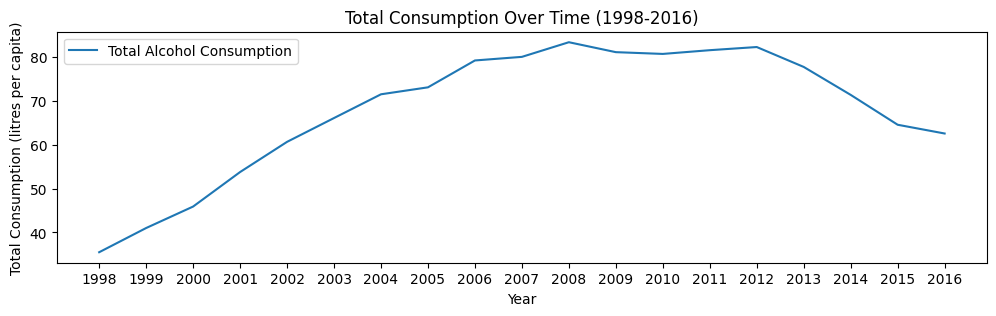

In [159]:
# Plot the graph
plt.figure(figsize=(12, 3))
plt.plot(df['year'].unique(), df.groupby('year')['total_alcohol'].mean(), label='Total Alcohol Consumption')
plt.title(f'Total Consumption Over Time (1998-2016)')
plt.xlabel('Year')
plt.ylabel('Total Consumption (litres per capita)')
plt.legend()

# Round off the years on the x-axis
plt.xticks(np.arange(df['year'].min(), df['year'].max()+1, step=1))

plt.show()

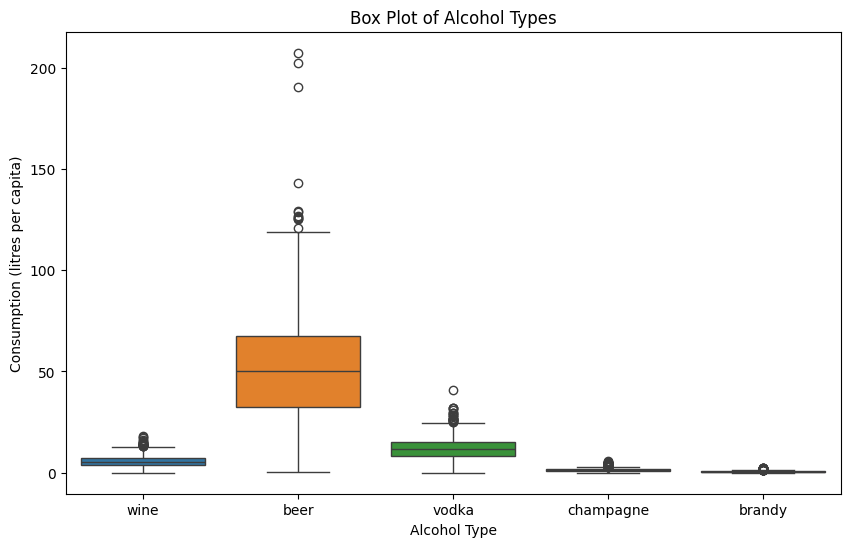

In [160]:
# Create box plot for each alcohol type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['wine', 'beer', 'vodka', 'champagne', 'brandy']])
plt.title('Box Plot of Alcohol Types')
plt.ylabel('Consumption (litres per capita)')
plt.xlabel('Alcohol Type')
plt.show()

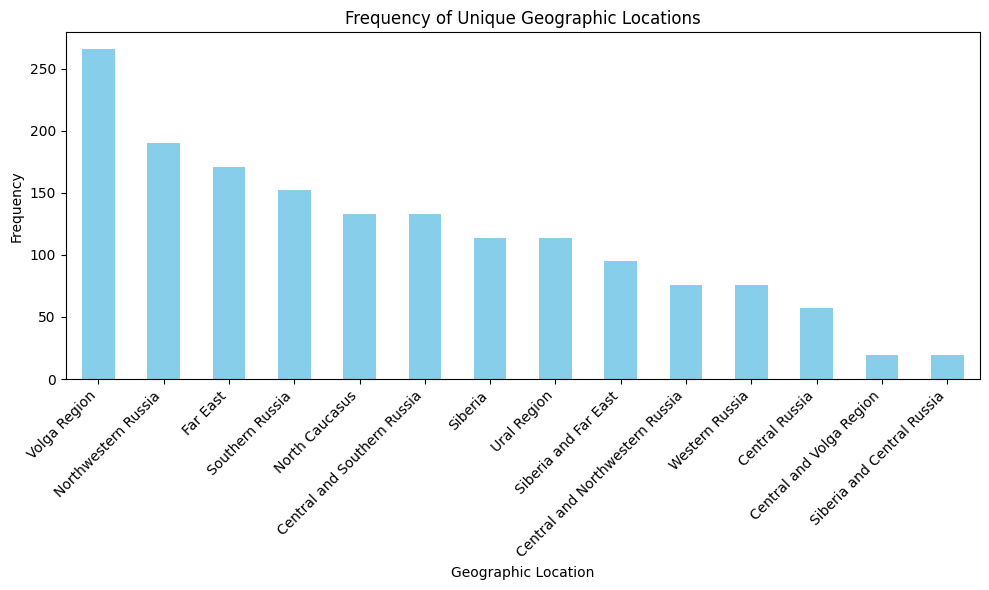

In [161]:
# Count the frequency of each unique location
location_counts = df['Geographic Location'].value_counts()

# Plot the unique counts
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Unique Geographic Locations')
plt.xlabel('Geographic Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

---
# DATA PREPROCESSING

- Removing the null values present in the dataset which does not contribute to the further analysis of the business problem.

In [162]:
#checking whether nan values exist or not
df.isna()

,year,region,wine,beer,vodka,champagne,brandy,Lat,Long,Geographic Location,total_alcohol,wine_percent,beer_percent,vodka_percent,champagne_percent,brandy_percent
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1612,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1613,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [163]:
# finding indexed having nan values
indexes_with_nan = df[df.isna().any(axis=1)].index.tolist()
print(len(indexes_with_nan))
print(df.iloc[indexes_with_nan])

66
      year                  region  wine  beer  vodka  champagne  brandy  \
17    1998  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN   
31    1998      Republic of Crimea   NaN   NaN    NaN        NaN     NaN   
63    1998              Sevastopol   NaN   NaN    NaN        NaN     NaN   
79    1998        Chechen Republic   NaN   NaN    NaN        NaN     NaN   
102   1999  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN   
...    ...                     ...   ...   ...    ...        ...     ...   
1439  2014        Chechen Republic   NaN   4.9    NaN        NaN     NaN   
1462  2015  Republic of Ingushetia   NaN   0.5    NaN        NaN     NaN   
1524  2015        Chechen Republic   NaN   2.2    NaN        NaN     NaN   
1547  2016  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN   
1609  2016        Chechen Republic   NaN   1.2    NaN        NaN     NaN   

        Lat   Long Geographic Location  total_alcohol  wine_percent  \
17    43.26  

In [164]:
# finding indexed having nan values
indexes_with_nan = df[df.isna().any(axis=1)].index.tolist()
print(len(indexes_with_nan))
print(df.iloc[indexes_with_nan])
# based on nan indexex, finding their regions
null_value_regions = set()
for i in indexes_with_nan:
    null_value_regions.add(df.iloc[i]['region'])

null_value_regions = list(null_value_regions)
print(null_value_regions)

66
      year                  region  wine  beer  vodka  champagne  brandy  \
17    1998  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN   
31    1998      Republic of Crimea   NaN   NaN    NaN        NaN     NaN   
63    1998              Sevastopol   NaN   NaN    NaN        NaN     NaN   
79    1998        Chechen Republic   NaN   NaN    NaN        NaN     NaN   
102   1999  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN   
...    ...                     ...   ...   ...    ...        ...     ...   
1439  2014        Chechen Republic   NaN   4.9    NaN        NaN     NaN   
1462  2015  Republic of Ingushetia   NaN   0.5    NaN        NaN     NaN   
1524  2015        Chechen Republic   NaN   2.2    NaN        NaN     NaN   
1547  2016  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN   
1609  2016        Chechen Republic   NaN   1.2    NaN        NaN     NaN   

        Lat   Long Geographic Location  total_alcohol  wine_percent  \
17    43.26  

In [165]:
for region in null_value_regions:
    # Filter dataframe for the current region and rows with missing values
    region_null_rows = df[(df['region'] == region) & df.isnull().any(axis=1)]

    # Print the region name
    print(f"Region: {region}")

    # Display the table for the current region
    print(region_null_rows)
    print("\n")  # Add a newline for better readability

Region: Republic of Crimea
      year              region  wine  beer  vodka  champagne  brandy   Lat  \
31    1998  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
116   1999  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
201   2000  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
286   2001  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
371   2002  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
456   2003  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
541   2004  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
626   2005  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
711   2006  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
796   2007  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
881   2008  Republic of Crimea   NaN   NaN    NaN        NaN     NaN  45.0   
966   2009  Republic of Crimea   NaN 

All the 4 regions are not having any data for the data analysis for maximun number of years from 1998 - 2016.

- So we are removing those data w.r.t the 4 regions including other years with data to avoid misguidance in analysis.

In [166]:
# droping regions having nan values
df = df[~df['region'].isin(null_value_regions)]
print(df.shape)

(1539, 16)


In [167]:
df

,year,region,wine,beer,vodka,champagne,brandy,Lat,Long,Geographic Location,total_alcohol,wine_percent,beer_percent,vodka_percent,champagne_percent,brandy_percent
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,44.69,40.15,North Caucasus,14.5,13.103448,60.689655,23.448276,2.068966,0.689655
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,53.79,83.75,Siberia and Far East,35.0,9.428571,54.857143,32.285714,3.142857,0.285714
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,53.43,127.26,Far East,41.7,5.035971,50.839329,41.486811,1.678657,0.959233
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,63.56,43.12,Northwestern Russia,27.3,15.750916,38.827839,42.857143,1.465201,1.098901
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,47.23,47.16,Southern Russia,31.4,9.235669,57.324841,30.254777,2.547771,0.636943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,55.60,47.15,Volga Region,56.1,8.912656,75.401070,13.725490,1.247772,0.713012
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,66.00,169.49,Far East,52.4,7.442748,64.885496,22.137405,3.435115,2.099237
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,63.00,130.00,Far East,70.9,6.064880,79.125529,11.565585,2.538787,0.705219
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,66.01,76.47,Ural Region,91.5,4.918033,82.841530,8.961749,1.857923,1.420765


In [168]:
total_regions = df['region'].unique()
print(len(total_regions))

81


# TIME-SERIES PLOT

Trend of each alcohol along the time line with respect to the Mean of the consumption per capita.

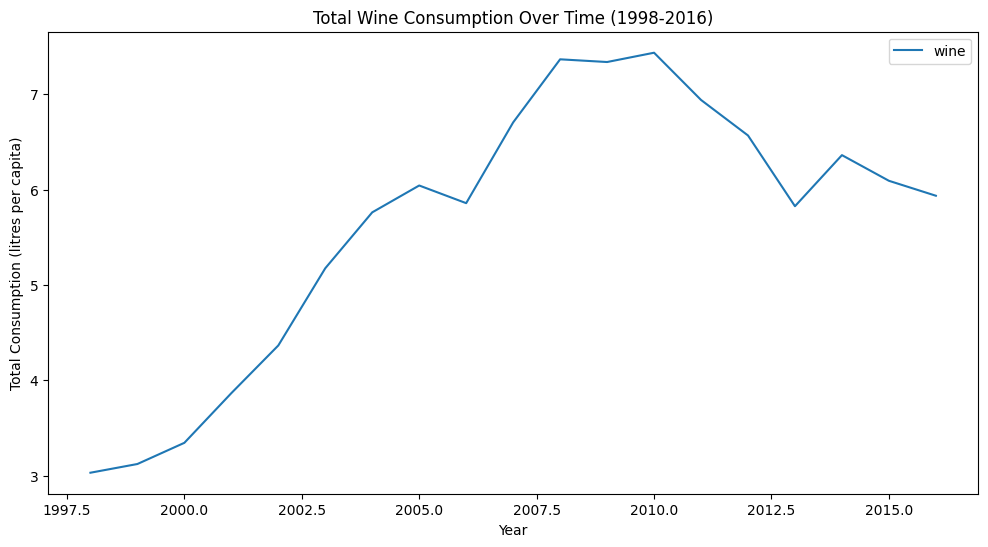

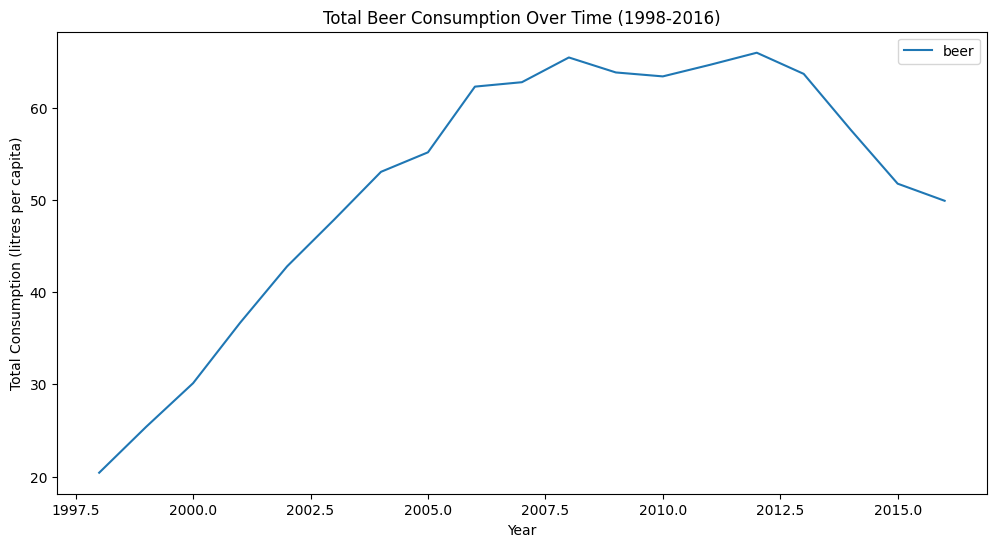

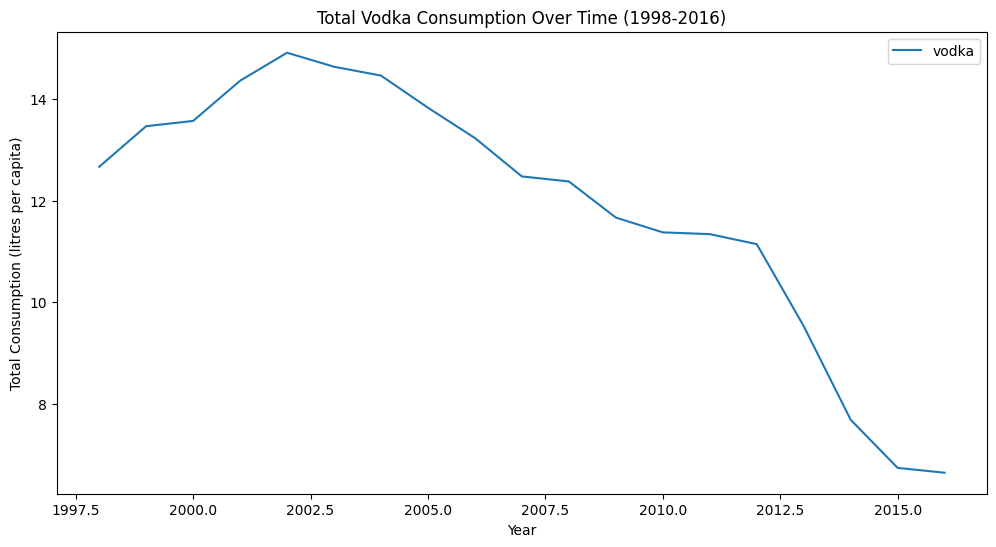

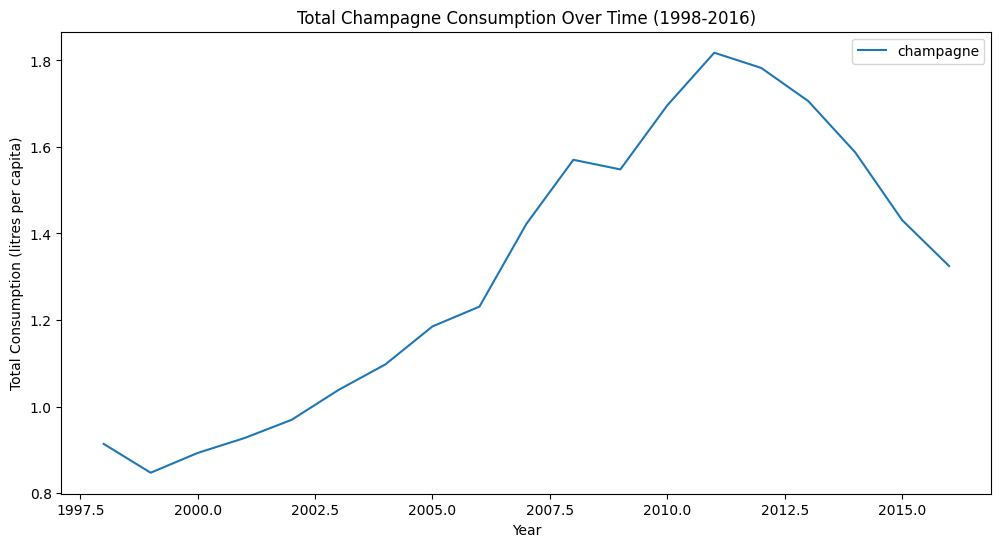

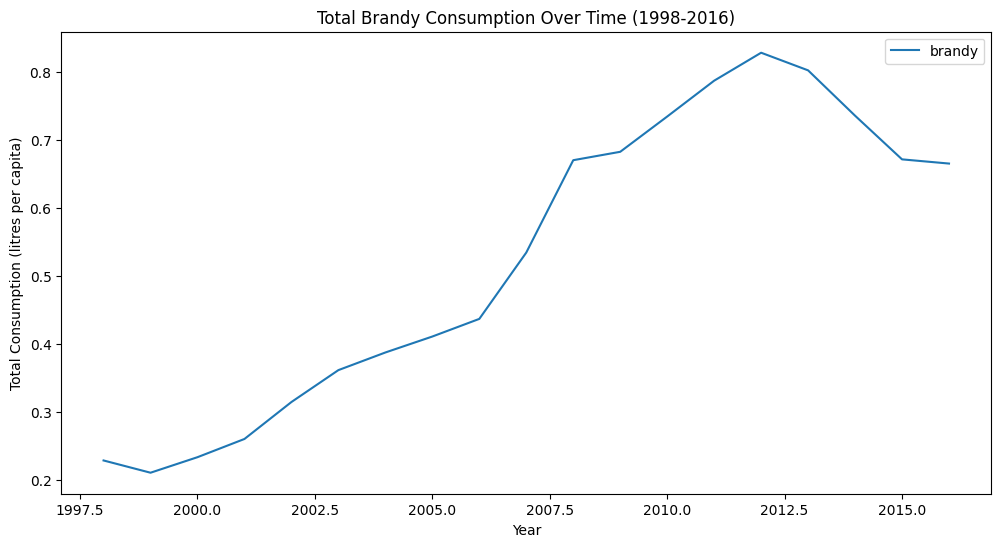

In [169]:
# List of alcohol types
alcohol_types = ['wine', 'beer', 'vodka', 'champagne', 'brandy']

# Plotting each alcohol type
for alcohol in alcohol_types:
    plt.figure(figsize=(12, 6))
    plt.plot(df['year'].unique(), df.groupby('year')[alcohol].mean(), label=alcohol)
    plt.title(f'Total {alcohol.capitalize()} Consumption Over Time (1998-2016)')
    plt.xlabel('Year')
    plt.ylabel('Total Consumption (litres per capita)')
    plt.legend()
    plt.show()

All the alcohol types are facing declining trend over the last 6 years with slight up & down grades in the consumption.

In [170]:
numerical_columns = ['wine','beer','vodka','champagne','brandy']

In [171]:
categorical_summary = df.describe(include=['object'])
categorical_summary

,region,Geographic Location
count,1539,1539
unique,81,14
top,Republic of Adygea,Volga Region
freq,19,266


All the categories are having histo ploted for checking the variability within their ranges.

# Correlation between the Alcohols

<ipython-input-172-d9adb3ed097f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



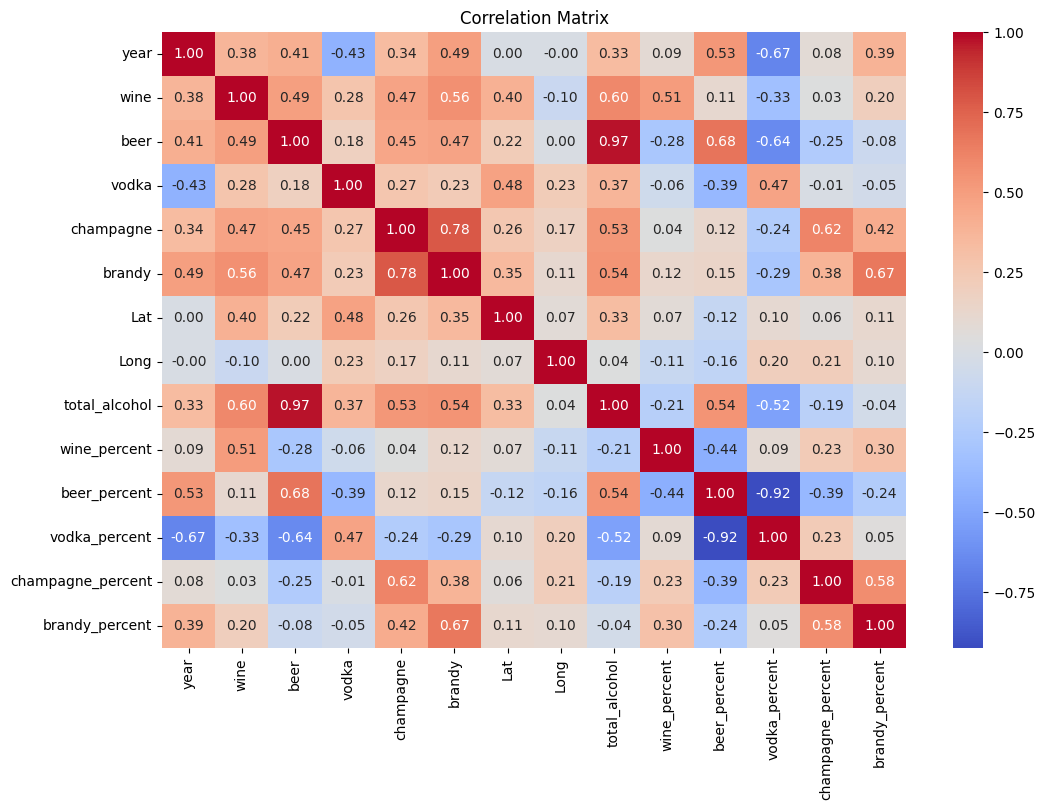

In [172]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation analysis to identify the relationships between the categoris for better research analysis based on market needs and sales trends.

- Among all the alcohol categories, we could find an high correlation between the 'Champagne' & 'Brandy'.

- This shows that whenever there is an increase in the Champagne sales or consumption, there is always an increase in the 'Brandy" sales or consumption.

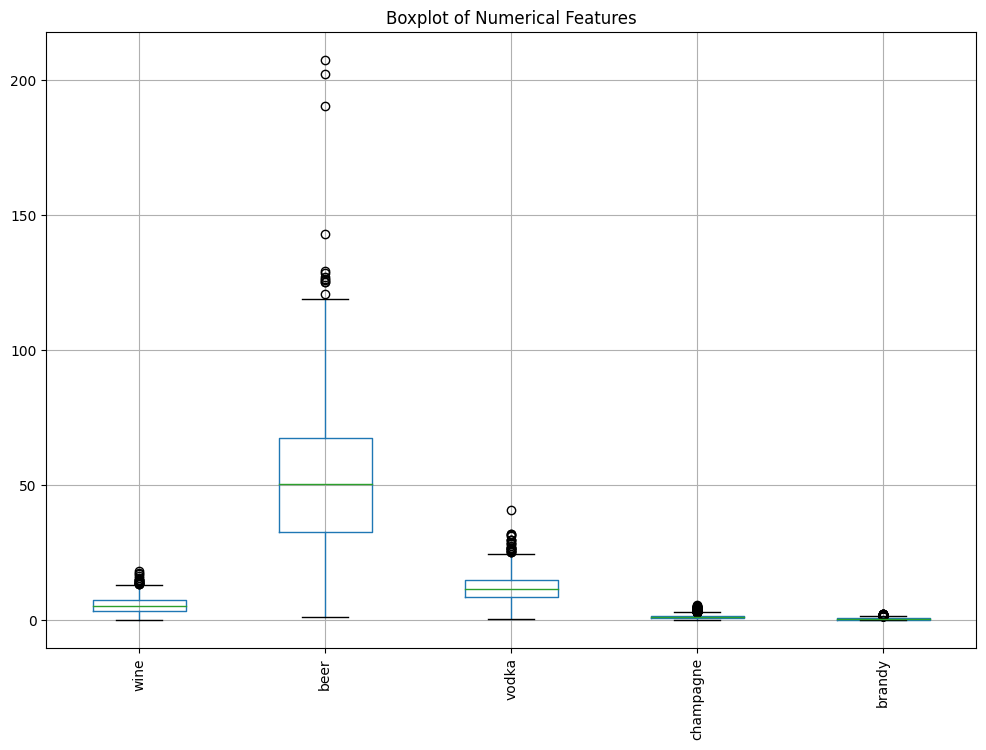

In [173]:
# Creating a boxplot
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot(rot=90)
plt.title('Boxplot of Numerical Features')
plt.show()

Box plots shows the outliers in each cateogry to remove.

Though we have to take a look into the Box plot of Saint Petersburg for removing outliers which are not needed.

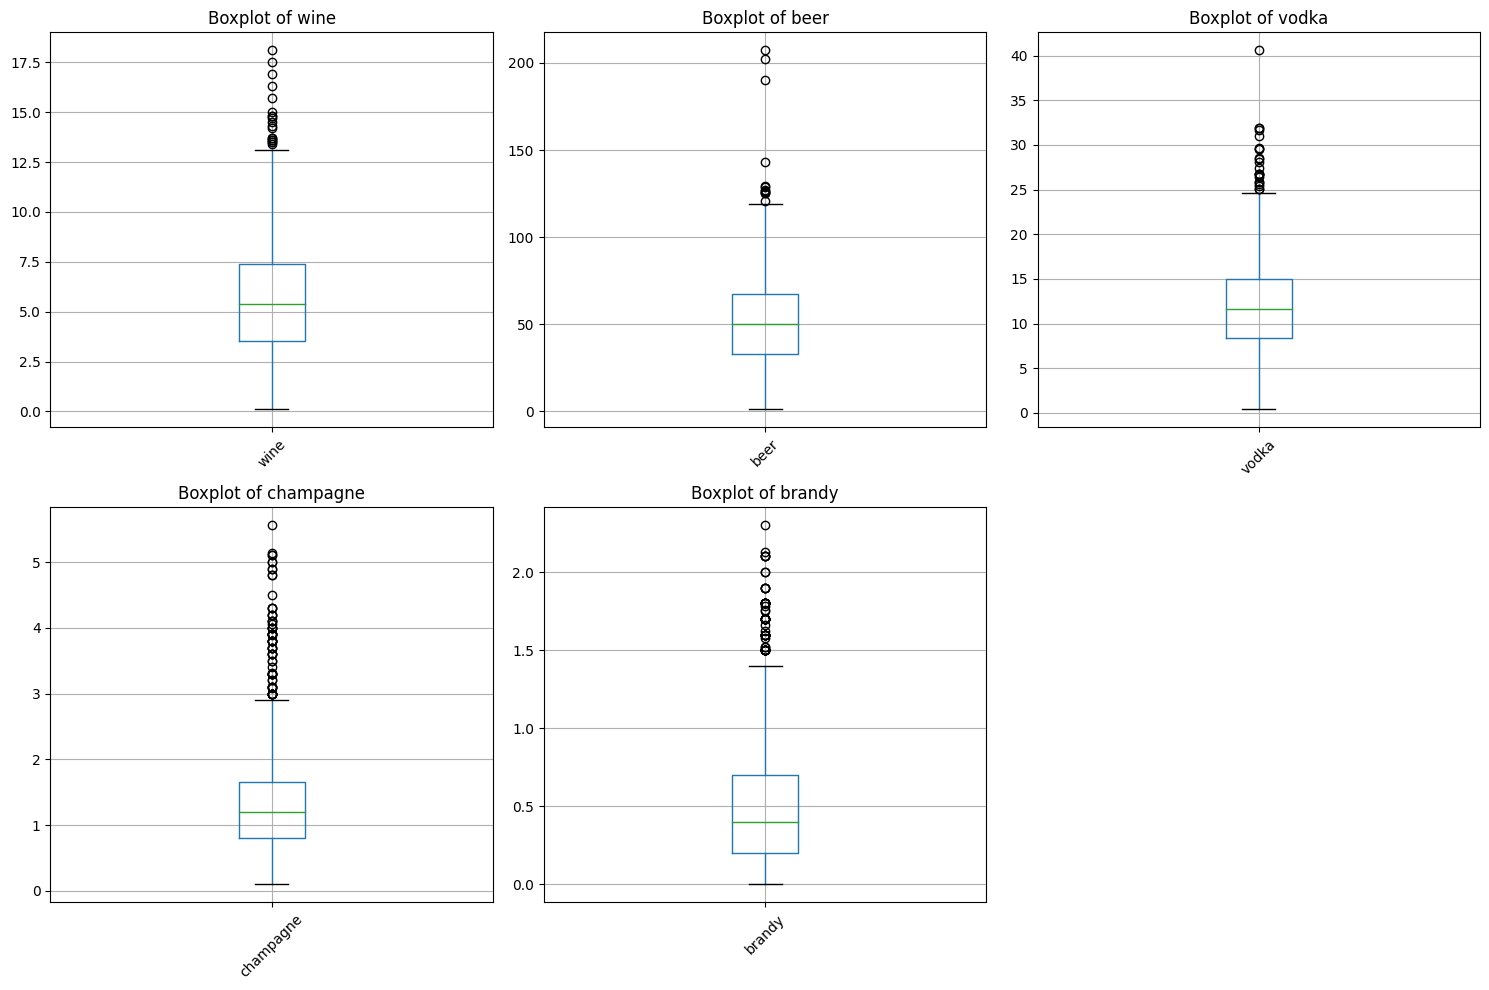

In [174]:
numerical_columns = ['wine', 'beer', 'vodka', 'champagne', 'brandy']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Geographical analysis

Require the Latitude and Longitude values of each location to plot the regional structure of density of consumption for each region.

In [175]:
!pip install geopy

In [176]:
from geopy.geocoders import Nominatim

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Create a dictionary to store the coordinates
coordinates = {}

# Iterate over unique region names in the DataFrame
for region in df['region'].unique():
    # Fetch latitude and longitude coordinates for the region
    location = geolocator.geocode(region)
    # Add coordinates to the dictionary
    coordinates[region] = (location.latitude, location.longitude)

# Convert the dictionary to a DataFrame
coordinates_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])

# Merge coordinates DataFrame with the original DataFrame on the 'region' column
df_with_coordinates = pd.merge(df, coordinates_df, left_on='region', right_index=True)

# Print the DataFrame with coordinates
df_with_coordinates

,year,region,wine,beer,vodka,champagne,brandy,Lat,Long,Geographic Location,total_alcohol,wine_percent,beer_percent,vodka_percent,champagne_percent,brandy_percent,Latitude,Longitude
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,44.69,40.15,North Caucasus,14.5,13.103448,60.689655,23.448276,2.068966,0.689655,44.693901,40.152042
85,1999,Republic of Adygea,2.3,11.2,4.3,0.3,0.1,44.69,40.15,North Caucasus,18.2,12.637363,61.538462,23.626374,1.648352,0.549451,44.693901,40.152042
170,2000,Republic of Adygea,3.1,27.4,5.4,0.6,0.1,44.69,40.15,North Caucasus,36.6,8.469945,74.863388,14.754098,1.639344,0.273224,44.693901,40.152042
255,2001,Republic of Adygea,3.8,22.0,7.8,0.5,0.1,44.69,40.15,North Caucasus,34.2,11.111111,64.327485,22.807018,1.461988,0.292398,44.693901,40.152042
340,2002,Republic of Adygea,4.4,30.4,7.9,0.7,0.3,44.69,40.15,North Caucasus,43.7,10.068650,69.565217,18.077803,1.601831,0.686499,44.693901,40.152042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,2012,Yaroslavl Oblast,9.7,73.4,12.7,1.9,1.1,57.63,39.89,Central and Northwestern Russia,98.8,9.817814,74.291498,12.854251,1.923077,1.113360,57.778198,39.002110
1359,2013,Yaroslavl Oblast,7.6,79.3,11.1,1.7,1.0,57.63,39.89,Central and Northwestern Russia,100.7,7.547170,78.748759,11.022840,1.688183,0.993049,57.778198,39.002110
1444,2014,Yaroslavl Oblast,9.9,60.9,9.8,1.5,1.0,57.63,39.89,Central and Northwestern Russia,83.1,11.913357,73.285199,11.793020,1.805054,1.203369,57.778198,39.002110
1529,2015,Yaroslavl Oblast,9.3,39.0,8.7,1.4,0.9,57.63,39.89,Central and Northwestern Russia,59.3,15.682968,65.767285,14.671164,2.360877,1.517707,57.778198,39.002110


In [177]:
# Plot the data on a map
import plotly.express as px
fig = px.scatter_geo(df, lat='Lat', lon='Long', hover_name='region', size='total_alcohol', projection="natural earth")
fig.show()

#CLUSTERING

In [178]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Extract relevant features (alcohol consumption over the years)
features = ['wine', 'beer', 'vodka', 'champagne', 'brandy']

# Group by region and calculate mean alcohol consumption over the years
average_by_region = df.groupby('region')[features].mean()

# Display the DataFrame with cluster labels
print(average_by_region)

                                    wine       beer      vodka  champagne  \
region                                                                      
Altai Krai                      3.174211  48.373158   9.465789   1.207368   
Altai Republic                  5.190000  36.724211   9.683684   0.934737   
Amur Oblast                     5.221579  53.377368  14.216842   1.115789   
Arkhangelsk Oblast              8.670000  47.036842  17.381053   1.631053   
Astrakhan Oblast                4.469474  54.695263   9.296842   0.861579   
...                                  ...        ...        ...        ...   
Vologda Oblast                  9.328421  67.206842  17.217895   0.857368   
Voronezh Oblast                 4.637895  54.911053   9.916316   1.500000   
Yamalo-Nenets Autonomous Okrug  5.312105  80.137895  15.093158   1.485789   
Yaroslavl Oblast                7.193158  63.331579  14.944211   1.241053   
Zabaykalsky Krai                6.806316  67.812105  14.237368   1.114211   

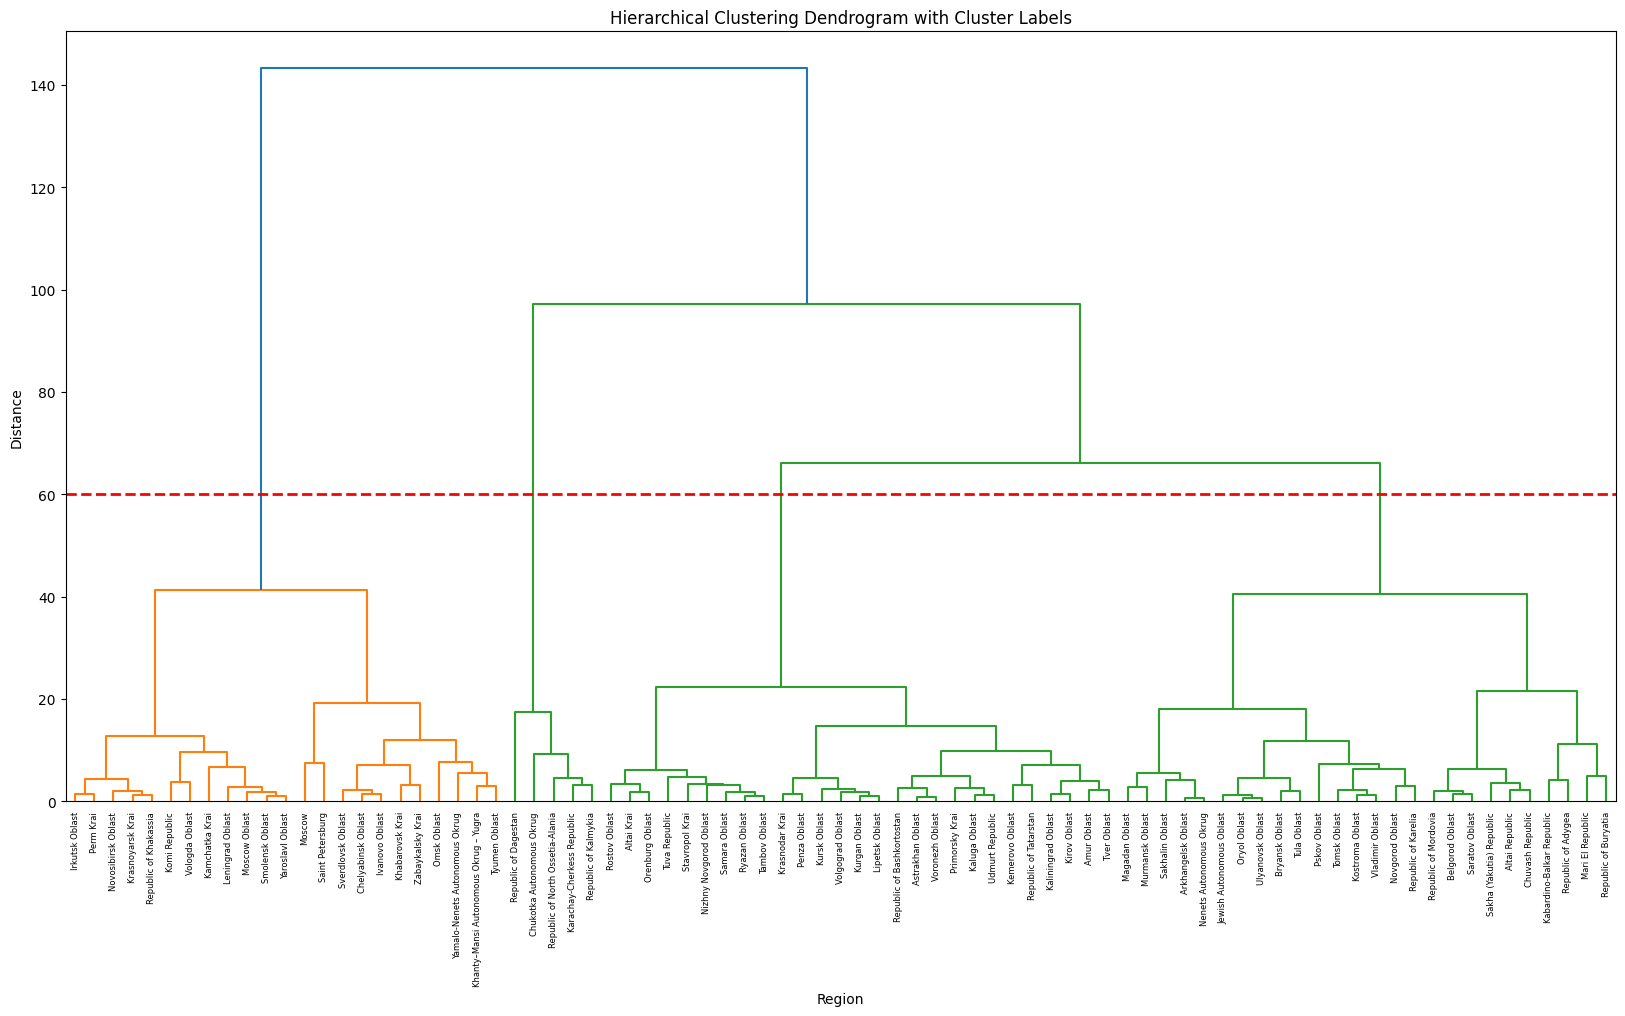

                                    wine       beer      vodka  champagne  \
region                                                                      
Altai Krai                      3.174211  48.373158   9.465789   1.207368   
Altai Republic                  5.190000  36.724211   9.683684   0.934737   
Amur Oblast                     5.221579  53.377368  14.216842   1.115789   
Arkhangelsk Oblast              8.670000  47.036842  17.381053   1.631053   
Astrakhan Oblast                4.469474  54.695263   9.296842   0.861579   
...                                  ...        ...        ...        ...   
Vologda Oblast                  9.328421  67.206842  17.217895   0.857368   
Voronezh Oblast                 4.637895  54.911053   9.916316   1.500000   
Yamalo-Nenets Autonomous Okrug  5.312105  80.137895  15.093158   1.485789   
Yaroslavl Oblast                7.193158  63.331579  14.944211   1.241053   
Zabaykalsky Krai                6.806316  67.812105  14.237368   1.114211   

In [179]:
# Calculate distance matrix using Ward linkage
distance_matrix = linkage(average_by_region, method='ward')

# Perform hierarchical clustering and obtain cluster labels
# You can adjust the distance threshold or the number of clusters as needed
cluster_labels = fcluster(distance_matrix, t=50, criterion='distance')

# Add the cluster labels as a new column in the DataFrame
average_by_region['cluster'] = cluster_labels

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(distance_matrix, labels=average_by_region.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram with Cluster Labels')
plt.xlabel('Region')
plt.ylabel('Distance')

# Add a horizontal dashed line to represent the clustering threshold
plt.axhline(y=60, color='r', linestyle='--', linewidth=2)  # Adjust the threshold as needed

plt.show()

# Display the DataFrame with cluster labels
print(average_by_region)

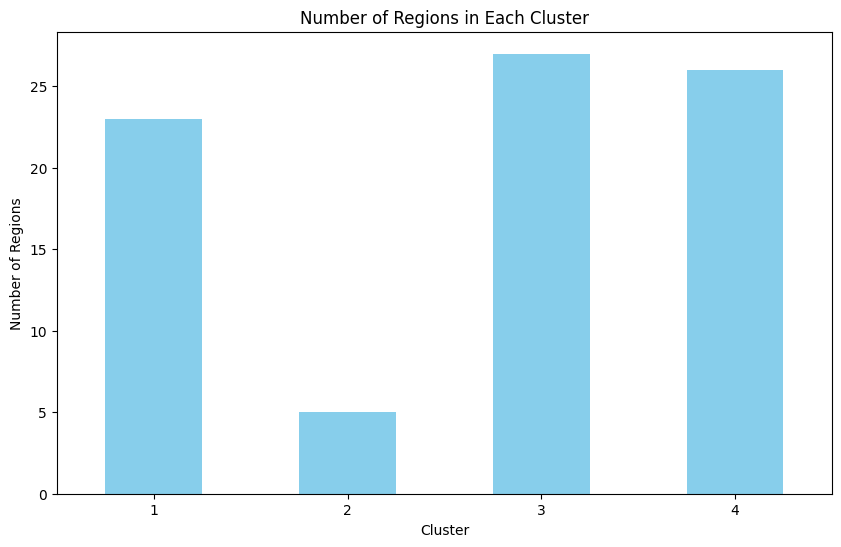

In [180]:
# Count the number of regions in each cluster
cluster_counts = average_by_region['cluster'].value_counts().sort_index()

# Plot the number of regions in each cluster
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Regions in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Regions')
plt.xticks(rotation=0)
plt.show()

In [181]:
# Find the cluster label of Saint Petersburg
saint_petersburg_cluster = average_by_region.loc['Saint Petersburg', 'cluster']

# Define the nearby clusters (clusters 1)
nearby_clusters = [saint_petersburg_cluster, saint_petersburg_cluster - 1]

# Filter the DataFrame for regions with nearby cluster labels
nearby_regions = average_by_region[average_by_region['cluster'].isin(nearby_clusters)]

# Display the selected regions and their details
print(nearby_regions)

                                           wine       beer      vodka  \
region                                                                  
Chelyabinsk Oblast                     6.944211  74.147368  12.943684   
Irkutsk Oblast                         6.352632  61.862632  12.920000   
Ivanovo Oblast                         7.237368  73.001053  12.360000   
Kamchatka Krai                         7.278421  59.572105  19.712105   
Khabarovsk Krai                        5.220526  70.191579  15.377368   
Khanty–Mansi Autonomous Okrug – Yugra  5.320526  73.845263  15.012105   
Komi Republic                          9.223684  65.744211  20.654211   
Krasnoyarsk Krai                       5.301053  64.717895  11.383158   
Leningrad Oblast                       7.786316  61.000000  15.809474   
Moscow                                 7.381579  83.688421  19.022105   
Moscow Oblast                          6.126316  62.602105  15.187368   
Novosibirsk Oblast                     4.205263  65

In [182]:
print(nearby_regions.shape)

(23, 6)


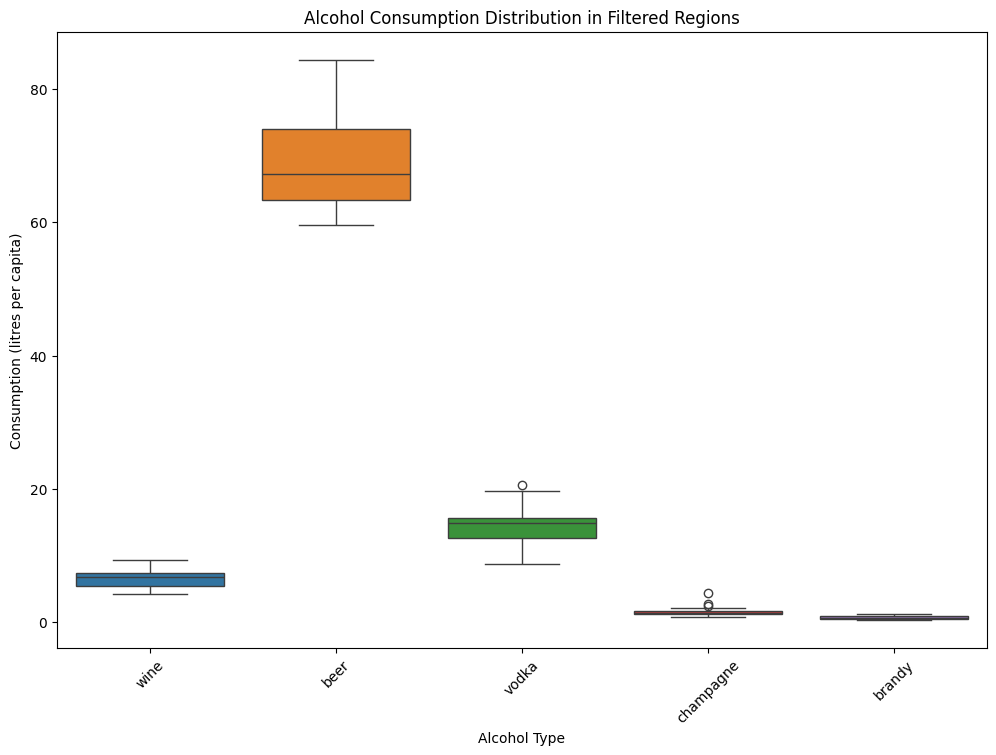

In [183]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=nearby_regions[['wine', 'beer', 'vodka', 'champagne', 'brandy']])
plt.title('Alcohol Consumption Distribution in Filtered Regions')
plt.xlabel('Alcohol Type')
plt.ylabel('Consumption (litres per capita)')
plt.xticks(rotation=45)
plt.show()

# COSINE SIMILARITY

In [184]:
from numpy.linalg import norm

def cosine_similarity(saint_petersburg, curr_region):
    cosine = np.dot(saint_petersburg, curr_region) / (norm(saint_petersburg) * norm(curr_region))
    return cosine

regions = nearby_regions.index.tolist()
saint_petersburg = nearby_regions.loc['Saint Petersburg'].tolist()
cosine_similarities = []
regions_list = []

# Calculate cosine similarity for each region
for region in regions:
    if region != 'Saint Petersburg':
        curr_region = nearby_regions.loc[region].tolist()
        cosine_sim = cosine_similarity(saint_petersburg, curr_region)
        cosine_similarities.append(cosine_sim)
        regions_list.append(region)

# Combine regions and cosine similarities into a DataFrame
cosine_similarity_df = pd.DataFrame({'Region': regions_list, 'Cosine Similarity': cosine_similarities})

# Sort DataFrame by cosine similarity in descending order
cosine_similarity_df = cosine_similarity_df.sort_values(by='Cosine Similarity', ascending=False)

# Select top 10 regions and their corresponding cosine similarities
top_10_regions_cosine = cosine_similarity_df.head(10)

# Display top 10 similar regions based on cosine similarity
print("Top 10 regions based on cosine similarity:")
print(top_10_regions_cosine)

Top 10 regions based on cosine similarity:
                            Region  Cosine Similarity
7                 Krasnoyarsk Krai           0.999353
12                     Omsk Oblast           0.999343
0               Chelyabinsk Oblast           0.999321
2                   Ivanovo Oblast           0.999304
14           Republic of Khakassia           0.998916
19  Yamalo-Nenets Autonomous Okrug           0.998712
16               Sverdlovsk Oblast           0.998657
17                   Tyumen Oblast           0.998582
11              Novosibirsk Oblast           0.998357
13                       Perm Krai           0.998178


#Collaborative Filtering

In [185]:
from sklearn.metrics.pairwise import euclidean_distances

# Assuming 'nearby_regions' is your DataFrame containing data for nearby regions including Saint Petersburg
saint_petersburg = nearby_regions.loc['Saint Petersburg'].values.reshape(1, -1)

# Calculate Euclidean distances between Saint Petersburg and all other regions
distances = euclidean_distances(saint_petersburg, nearby_regions)

# Combine distances with regions
distances_df = pd.DataFrame({'Region': nearby_regions.index, 'Distance': distances.flatten()})

# Remove Saint Petersburg from the DataFrame
distances_df = distances_df[distances_df['Region'] != 'Saint Petersburg']

# Sort regions based on distance from Saint Petersburg
top_10_regions_collaborative = distances_df.sort_values(by='Distance').head(10)

# Display top 10 similar regions based on collaborative filtering
print("Top 10 regions based on collaborative filtering:")
print(top_10_regions_collaborative)

Top 10 regions based on collaborative filtering:
                                   Region   Distance
20         Yamalo-Nenets Autonomous Okrug   5.687173
9                                  Moscow   7.496624
18                          Tyumen Oblast   8.204422
12                            Omsk Oblast   8.731732
0                      Chelyabinsk Oblast  10.353090
5   Khanty–Mansi Autonomous Okrug – Yugra  11.171667
2                          Ivanovo Oblast  11.516103
17                      Sverdlovsk Oblast  12.601445
4                         Khabarovsk Krai  14.738797
22                       Zabaykalsky Krai  16.807454


# DB Scan Method

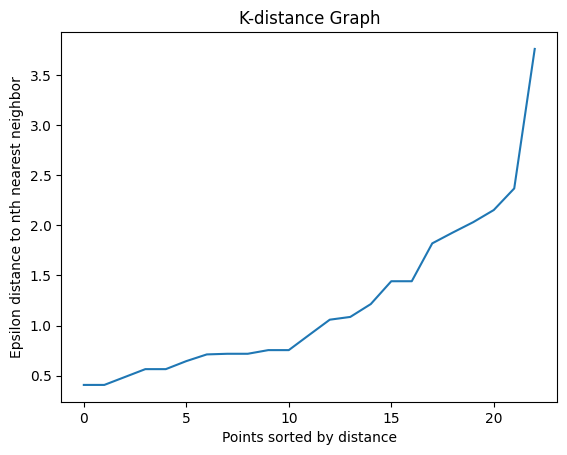

In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(nearby_regions.drop('cluster', axis=1))

# Determine optimal eps using K-distance graph
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance to nth nearest neighbor')
plt.show()

In [195]:
eps_values = np.arange(0.3, 1.1, 0.1)
min_samples_values = range(2, 10)
best_score = -1
best_eps = 0.5
best_min_samples = 5

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)
        if len(set(clusters)) > 1:
            score = silhouette_score(df_scaled, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}')

Best eps: 1.0000000000000002, Best min_samples: 2, Best silhouette score: 0.08468854423634331


<ipython-input-196-4d72a01dd8f0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



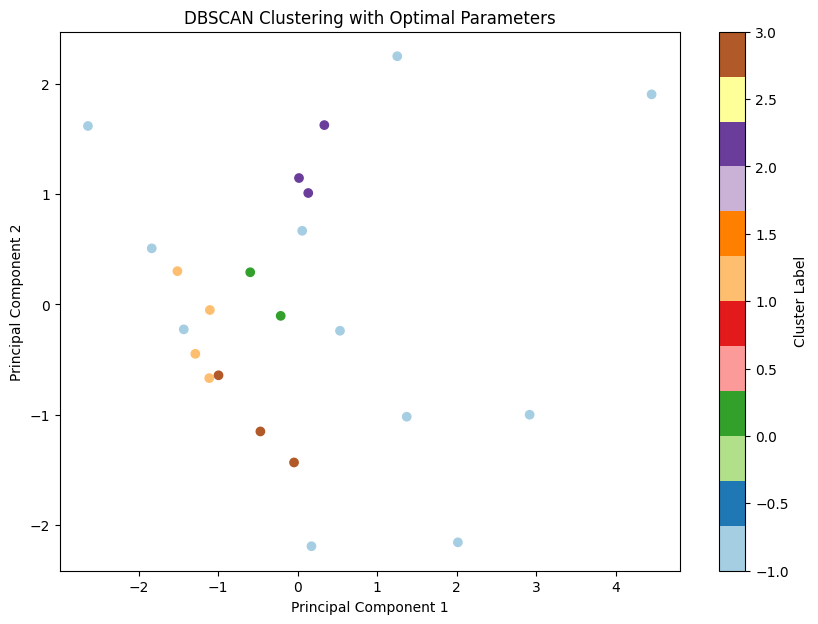

In [196]:
# Run DBSCAN with optimal parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
nearby_regions['cluster'] = dbscan.fit_predict(df_scaled)

# Visualize clusters with PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=nearby_regions['cluster'], cmap='Paired', marker='o')
plt.title('DBSCAN Clustering with Optimal Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [189]:
from sklearn.metrics.pairwise import euclidean_distances

# Ensure that 'Saint Petersburg' is in your DataFrame
if 'Saint Petersburg' in nearby_regions.index:
    # Find the cluster label for Saint Petersburg
    spb_cluster = nearby_regions.loc['Saint Petersburg', 'cluster']

    # Select data points that are in the same cluster as Saint Petersburg
    df_same_cluster = nearby_regions[nearby_regions['cluster'] == spb_cluster]

    # Exclude Saint Petersburg from this subset for distance calculation
    df_same_cluster = df_same_cluster[df_same_cluster.index != 'Saint Petersburg']

    # Calculate Euclidean distances between Saint Petersburg and all other points in the same cluster
    spb_features = nearby_regions.loc['Saint Petersburg', numerical_columns].values
    distances = euclidean_distances(df_same_cluster[numerical_columns], spb_features.reshape(1, -1))

    # Combine distances with regions
    distances_df = pd.DataFrame({'Region': df_same_cluster.index, 'Distance': distances.flatten()})

    # Sort regions based on distance from Saint Petersburg
    similar_regions = distances_df.sort_values(by='Distance')

    # Get the top 10 regions
    top_10_regions_dbscan = similar_regions.head(10)

    # Display top 10 similar regions based on DBScan clustering
    print("Top 10 regions based on DBScan clustering:")
    print("{:<40} {:<20}".format("Region", "Distance"))
    for region, distance in zip(top_10_regions_dbscan['Region'], top_10_regions_dbscan['Distance']):
        print("{:<40} {:<20}".format(region, distance))
else:
    top_10_regions_dbscan = pd.DataFrame()
    print(top_10_regions_dbscan)

Top 10 regions based on DBScan clustering:
Region                                   Distance            
Moscow                                   7.4966243372796795  
Omsk Oblast                              8.731731590303163   
Ivanovo Oblast                           11.516103274373616  
Khabarovsk Krai                          14.738796515139263  
Vologda Oblast                           18.23391994512135   
Novosibirsk Oblast                       19.358449213603816  
Komi Republic                            20.760033531855548  
Moscow Oblast                            22.06084814898629   
Leningrad Oblast                         23.73085626474892   
Kamchatka Krai                           26.031736602199985  


#RECOMMENDATION SYSTEM

In [198]:
# 4. Final Recommendations
common_regions = set(top_10_regions_cosine['Region']).intersection(set(top_10_regions_collaborative['Region'])).intersection(set(top_10_regions_dbscan['Region']))
final_recommendations = list(common_regions)
remaining_regions_cosine = set(top_10_regions_cosine['Region']) - common_regions
remaining_regions_collaborative = set(top_10_regions_collaborative['Region']) - common_regions
remaining_regions_dbscan = set(top_10_regions_dbscan['Region']) - common_regions

# 5. Merging with Geographic Location
merged_df_cosine = pd.merge(top_10_regions_cosine, df, left_on='Region', right_on='region', how='left')
merged_df_collaborative = pd.merge(top_10_regions_collaborative, df, left_on='Region', right_on='region', how='left')
merged_df_dbscan = pd.merge(top_10_regions_dbscan, df, left_index=True, right_index=True, how='left')

# 6. Displaying Results
print("Final Recommendations based on Common Regions:")
print("{:<40} {:<20} {:<20} {:<20} {:<30}".format("Region", "Cosine Similarity", "Collaborative Distance", "DBScan Distance", "Geographical Location"))
for region in final_recommendations:
    cosine_similarity_value = top_10_regions_cosine[top_10_regions_cosine['Region'] == region]['Cosine Similarity'].values[0]
    collaborative_distance = top_10_regions_collaborative[top_10_regions_collaborative['Region'] == region]['Distance'].values[0]
    dbscan_distance = top_10_regions_dbscan[top_10_regions_dbscan['Region'] == region]['Distance'].values[0]
    geographic_location = df[df['region'] == region]['Geographic Location'].values[0]
    print("{:<40} {:<20} {:<20} {:<20} {:<30}".format(region, cosine_similarity_value, collaborative_distance, dbscan_distance, geographic_location))

Final Recommendations based on Common Regions:
Region                                   Cosine Similarity    Collaborative Distance DBScan Distance      Geographical Location         
Moscow                                   0.9962282903181352   7.4966243372796795   7.4966243372796795   Western Russia                
Khabarovsk Krai                          0.9970498398999413   14.738796515139263   14.738796515139263   Far East                      
Ivanovo Oblast                           0.9993040099279145   11.516103274373616   11.516103274373616   Central Russia                


In [199]:
print("\nRemaining Regions based on Cosine Similarity:")
for region in remaining_regions_cosine:
    cosine_similarity_value = top_10_regions_cosine[top_10_regions_cosine['Region'] == region]['Cosine Similarity'].values[0]
    geographic_location = df[df['region'] == region]['Geographic Location'].values[0]
    print("{:<40} {:<20} {:<30}".format(region, cosine_similarity_value, geographic_location))

print("\nRemaining Regions based on Collaborative Filtering:")
for region in remaining_regions_collaborative:
    collaborative_distance = top_10_regions_collaborative[top_10_regions_collaborative['Region'] == region]['Distance'].values[0]
    geographic_location = df[df['region'] == region]['Geographic Location'].values[0]
    print("{:<40} {:<20} {:<30}".format(region, collaborative_distance, geographic_location))

print("\nRemaining Regions based on DBScan:")
for region in remaining_regions_dbscan:
    dbscan_distance = top_10_regions_dbscan[top_10_regions_dbscan['Region'] == region]['Distance'].values[0]
    geographic_location = df[df['region'] == region]['Geographic Location'].values[0]
    print("{:<40} {:<20} {:<30}".format(region, dbscan_distance, geographic_location))


Remaining Regions based on Cosine Similarity:
Khanty–Mansi Autonomous Okrug – Yugra    0.9972962422688115   Ural Region                   
Chelyabinsk Oblast                       0.999254221952254    Ural Region                   
Kamchatka Krai                           0.9832579871555926   Far East                      
Irkutsk Oblast                           0.9972027069206237   Siberia and Far East          
Komi Republic                            0.9852193878485441   Northwestern Russia           
Krasnoyarsk Krai                         0.9989984827423971   Siberia and Far East          
Leningrad Oblast                         0.9926627638206449   Northwestern Russia           

Remaining Regions based on Collaborative Filtering:
Khanty–Mansi Autonomous Okrug – Yugra    11.171666612598402   Ural Region                   
Chelyabinsk Oblast                       10.35309021540474    Ural Region                   
Zabaykalsky Krai                         16.80745369539935    S

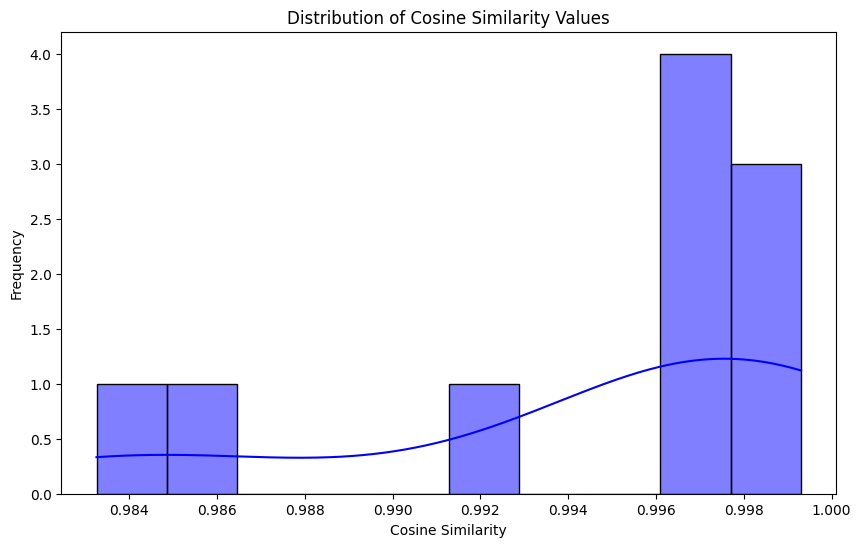

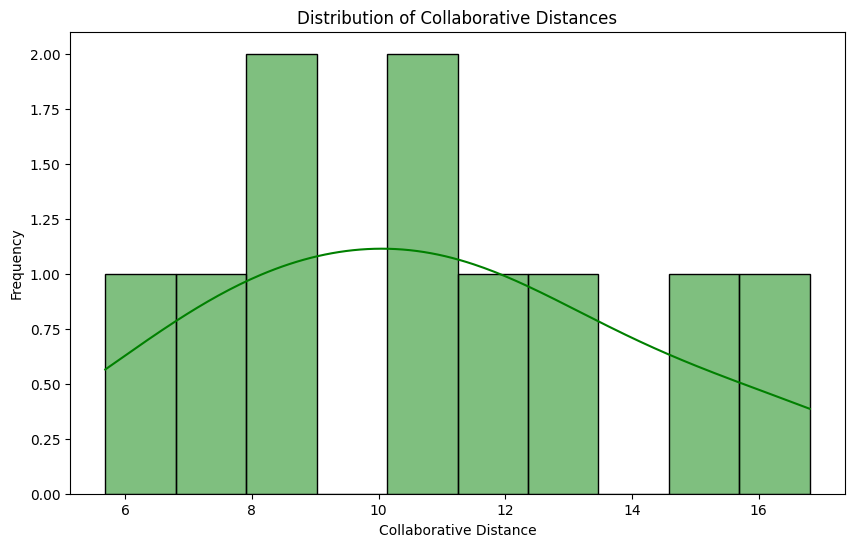

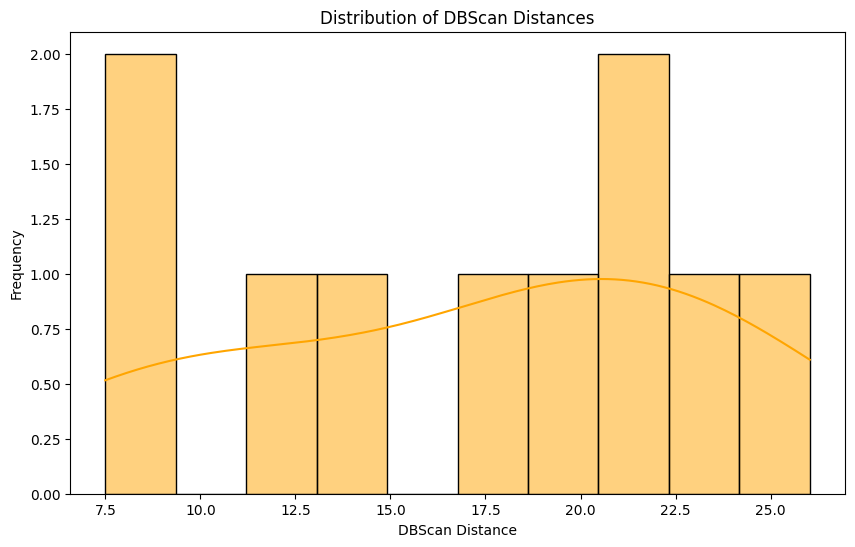

In [200]:
# Visualize the distribution of cosine similarity values
plt.figure(figsize=(10, 6))
sns.histplot(top_10_regions_cosine['Cosine Similarity'], bins=10, kde=True, color='blue')
plt.title('Distribution of Cosine Similarity Values')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of collaborative distances
plt.figure(figsize=(10, 6))
sns.histplot(top_10_regions_collaborative['Distance'], bins=10, kde=True, color='green')
plt.title('Distribution of Collaborative Distances')
plt.xlabel('Collaborative Distance')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of DBScan distances
plt.figure(figsize=(10, 6))
sns.histplot(top_10_regions_dbscan['Distance'], bins=10, kde=True, color='orange')
plt.title('Distribution of DBScan Distances')
plt.xlabel('DBScan Distance')
plt.ylabel('Frequency')
plt.show()

In [209]:
# Define the common regions
common_regions = [
    "Moscow",
    "Khabarovsk Krai",
    "Ivanovo Oblast"
]

# Define the other regions
other_regions = [
    "Khanty–Mansi Autonomous Okrug – Yugra",
    "Chelyabinsk Oblast",
    "Omsk Oblast",
    "Komi Republic",
    "Kamchatka Krai",
    "Leningrad Oblast",
    "Yamalo-Nenets Autonomous Okrug"
]

# Print common regions
print("Common Regions:")
for region in common_regions:
    print(region)

# Print other regions
print("\nOther Regions: Analyzed from the Geo locations and Values calculated")
for region in other_regions:
    print(region)

Common Regions:
Moscow
Khabarovsk Krai
Ivanovo Oblast

Other Regions: Analyzed from the Geo locations and Values calculated
Khanty–Mansi Autonomous Okrug – Yugra
Chelyabinsk Oblast
Omsk Oblast
Komi Republic
Kamchatka Krai
Leningrad Oblast
Yamalo-Nenets Autonomous Okrug


## 💪 Competition challenge

1. Recommend 10 additional regions they should select for the promotion.
2. Tell the story that supports your recommendations.

